K-Nearest Neighbors 

<center>
    <img src="https://machinelearningmastery.com/wp-content/uploads/2019/10/Develop-k-Nearest-Neighbors-in-Python-From-Scratch.png">
</center>



## Part 1: KNNs from Scratch 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import pandas as pd
import statistics
import PIL
!pip install idx2numpy
import idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7907 sha256=58f72abfb75c5fe3a241cea58e7a7f85f54e785f82375c12b8ab75cdf9aaa031
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


In [7]:
from google.colab import drive
import idx2numpy
import os
# Mount Google Drive
drive.mount('/content/drive')

# Check files in the main My Drive directory or the specific folder
folder_path = '/content/drive/My Drive/mnist'  # Change this path if needed
print(os.listdir(folder_path))  # Lists all files and folders in the specified path

# Define the correct file paths (update if needed)
train_images_path = "/content/drive/My Drive/mnist/train-images.idx3-ubyte"
train_labels_path = "/content/drive/My Drive/mnist/train-labels.idx1-ubyte"
test_images_path = "/content/drive/My Drive/mnist/t10k-images.idx3-ubyte"
test_labels_path = "/content/drive/My Drive/mnist/t10k-labels.idx1-ubyte"


# Convert the idx files to numpy
train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)
test_images = idx2numpy.convert_from_file(test_images_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)

# Print the shape of the multidimensional array for both train and test set
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Mounted at /content/drive
['t10k-labels.idx1-ubyte', 't10k-images.idx3-ubyte', 'train-images.idx3-ubyte', 'train-labels.idx1-ubyte']
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [8]:
#TODO: Flatten the array, append the labels and print the shape again [5 mark]
#The shape of your train set should be (60000, 785), and test set should be (10000, 785)
#IMPORTANT: If your shapes are not matching, dont attempt the rest of the assignment unless you get it right.


# Step 2: Flatten the images
train_images_flattened = train_images.reshape(train_images.shape[0], -1)  # Shape: (60000, 784)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)      # Shape: (10000, 784)

# Step 3: Append the labels
train_set = np.hstack((train_images_flattened, train_labels.reshape(-1, 1)))  # Shape: (60000, 785)
test_set = np.hstack((test_images_flattened, test_labels.reshape(-1, 1)))    # Shape: (10000, 785)

# Step 4: Print the shape again
print(f"Train set shape: {train_set.shape}")  # Should print (60000, 785)
print(f"Test set shape: {test_set.shape}")    # Should print (10000, 785)




Train set shape: (60000, 785)
Test set shape: (10000, 785)


### Task 2: Visualizing and preprocessing the dataset


In [9]:
#TODO: Extract labels and features [2 marks]
train_features = train_set[:, :-1]  # All rows, all columns except the last one (pixel data)
train_labels = train_set[:, -1]     # All rows, only the last column (labels)

test_features = test_set[:, :-1]    # Same for the test set
test_labels = test_set[:, -1]

# print(train_x.shape)
# print(train_y.shape)
# print(test_x.shape)
# print(test_y.shape)
print(f"Train images shape: {train_features.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_features.shape}")
print(f"Test labels shape: {test_labels.shape}")

# print(f"Max pixel value in normalized test set: {np.max(test_features)}")
# print(f"Min pixel value in normalized test set: {np.min(test_features)}")


Train images shape: (60000, 784)
Train labels shape: (60000,)
Test images shape: (10000, 784)
Test labels shape: (10000,)


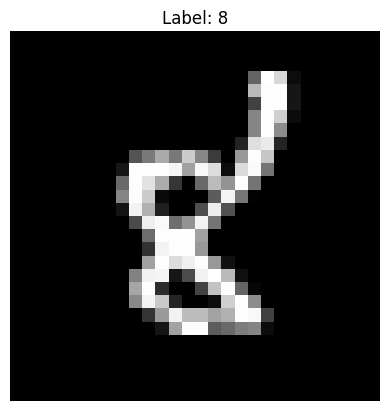

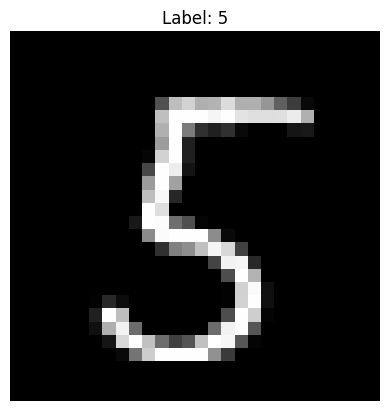

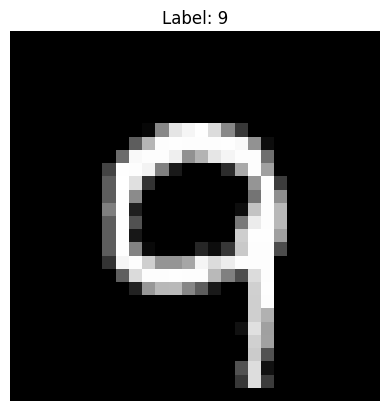

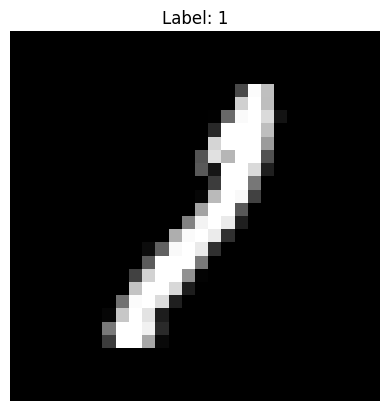

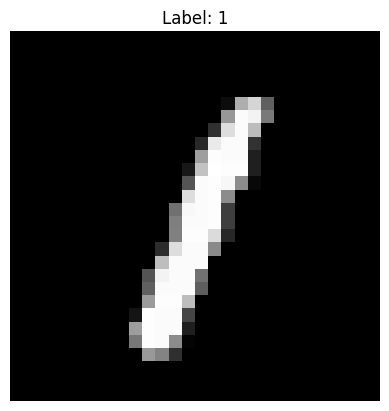

In [10]:
# TODO: Implement a function to display image. The label should be used as a title [6 marks]
#      Randomly pick 5 rows from the training dataset and display their images

def display_image(features, label):
    '''
      Takes a 1D numpy array, reshapes to a 28x28 array and displays the image
    '''
    # Reshape the 1D array of 784 values into a 28x28 image
    image = features.reshape(28, 28)

    # Plot the image using matplotlib
    plt.imshow(image, cmap='gray')  # Display image in grayscale
    plt.title(f"Label: {int(label)}")  # Use label as the title
    plt.axis('off')  # Turn off axis lines and labels
    plt.show()  # Display the image

random_indices = np.random.choice(train_features.shape[0], 5, replace=False)  # Pick 5 random indices

for idx in random_indices:
    display_image(train_features[idx], train_labels[idx])



In [11]:
#TODO: normalize the data so that it falls in the [0, 1] range. [2 marks]
#      Hint: the max value of each pixel is 255

def normalize(data):
  '''
    scales the data to the range [0, 1]
  '''
  '''
    Scales the data to the range [0, 1].
    Each pixel value is divided by 255.

    Args:
    data (numpy array): The array containing pixel values.

    Returns:
    numpy array: Normalized data where all pixel values are in the [0, 1] range.
    '''
  return data / 255.0  # Divide all pixel values by 255 to scale them to [0, 1]

train_features_normalized = normalize(train_features)
test_features_normalized = normalize(test_features)

print(f"Train features normalized shape: {train_features_normalized.shape}")
print(f"Max pixel value in normalized train set: {np.max(train_features_normalized)}")
print(f"Min pixel value in normalized train set: {np.min(train_features_normalized)}")
print(f"test features normalized shape: {test_features_normalized.shape}")
print(f"Max pixel value in normalized test set: {np.max(test_features_normalized)}")
print(f"Min pixel value in normalized test set: {np.min(test_features_normalized)}")

Train features normalized shape: (60000, 784)
Max pixel value in normalized train set: 1.0
Min pixel value in normalized train set: 0.0
test features normalized shape: (10000, 784)
Max pixel value in normalized test set: 1.0
Min pixel value in normalized test set: 0.0


###  Implementing k-NN Classifier 


In [ ]:
# TODO: Complete the class below


class KNN:

    def __init__(self, k):
        # DO NOT EDIT !#
        '''
          Initializes the class
        '''
        self.k = k
        self.train_x = None
        self.train_y = None

    def euclidean_distance(self, x1, x2):  # [4 marks]
        # USE NUMPY METHODS
        '''
          Takes two numpy arrays and calculates the euclidean distance between them
        '''
        return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))


    def manhattan_distance(self, x1, x2):  # [4 marks]
        # USE NUMPY METHODS
        '''
          Takes two numpy arrays and calculates the manhattan distance between them
        '''
        return np.sum(np.abs(x1 - x2), axis=1)

    def fit(self, train_x, train_y):  # [1 mark]
        '''
          Stores the training dataset
        '''
        self.train_x = train_x
        self.train_y = train_y

    def get_neighbors(self, new_point, distancefunc):
        '''
          Takes a new point and returns the k nearest neighbors and their distances
        '''
        distances = distancefunc(self.train_x, new_point)
        k_indices = np.argpartition(distances, self.k)[:self.k]
        return self.train_y[k_indices], distances[k_indices]


    def most_frequent(self, neighbors, distances):
        '''
        Finds the most frequent element in the array of neighbors,
        If there's a tie, return a random neighbor using numpy.
        '''
        # If there is only one neighbor, return it directly
        if len(neighbors) == 1:
            return neighbors[0]

        k = len(neighbors)  # Start with the current number of neighbors (self.k)

        while k > 0:
            w = 1 / (distances[:k] + 1e-5)  # Adding small value to avoid division by zero
            w_count = {}

            for neighbor, weight in zip(neighbors[:k], w):
                if neighbor in w_count:
                    w_count[neighbor] += weight
                else:
                    w_count[neighbor] = weight

            max_w = max(w_count.values())

            # Check for ties
            tied_labels = [label for label, weight in w_count.items() if weight == max_w]

            if len(tied_labels) == 1:
                # If no tie, return the most frequent label
                return tied_labels[0]

            # If tie occurs, reduce k and repeat
            k -= 1

        # In case of a tie even when k = 1, return the first neighbor (as a fallback)
        return neighbors[0]

    def predict(self, test_x, distancefunc):
        '''
          Takes a test set and returns the predicted labels
        '''
        predictions = []
        for test_point in test_x:
            neighbors, distances = self.get_neighbors(test_point, distancefunc)
            most_common_label = self.most_frequent_weighted(neighbors, distances)
            predictions.append(most_common_label)
        return np.array(predictions)


### Evaluation 





In [ ]:
def accuracy(predicted_labels, true_labels):  # [2 marks]
    '''
      Takes the predicted labels and the true labels and returns the accuracy
    '''
    correct_predictions = (predicted_labels == true_labels).sum()
    total_predictions = true_labels.shape[0]
    return correct_predictions / total_predictions*100


def make_confusion_matrix(predicted_labels, true_labels):  # [6 marks]
    '''
      Takes the predicted labels and the true labels and returns the confusion matrix
      Hint: You can create a helper function which calculates each row of the confusion matrix
    '''
    num_classes = 10
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    true_labels = true_labels.astype(int)
    predicted_labels = predicted_labels.astype(int)

    assert np.all(true_labels >= 0) and np.all(true_labels < num_classes), "True labels out of bounds"
    assert np.all(predicted_labels >= 0) and np.all(predicted_labels < num_classes), "Predicted labels out of bounds"

    for true, pred in zip(true_labels, predicted_labels):
        confusion_matrix[true, pred] += 1

    return confusion_matrix


def make_heat_map(confusion_matrix, title):  # [4 marks]
    '''
      Takes the confusion matrix and plots it as a heatmap
    '''
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


def precision(confusion_matrix, class_label):  # [2 marks]
    '''
      Takes the confusion matrix and a label and returns the precision
    '''
    true_positive = confusion_matrix[class_label][class_label]
    false_positive = confusion_matrix[:, class_label].sum() - true_positive
    return true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0



def recall(confusion_matrix, class_label):  # [2 marks]
    '''
      Takes the confusion matrix and a label and returns the recall
    '''
    true_positive = confusion_matrix[class_label][class_label]
    false_negative = confusion_matrix[class_label].sum() - true_positive
    return true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0


def f1_score(precision, recall):  # [2 marks]
    '''
      Takes the precision and recall and returns the f1 score
    '''

    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


def macro_average_f1(confusion_matrix):  # [4 marks]
    '''
      Calculates the macro-average F1 score from a provided confusion matrix, over all classes
    '''
    f1_scores = []
    for class_label in range(confusion_matrix.shape[0]):
        prec = precision(confusion_matrix, class_label)
        rec = recall(confusion_matrix, class_label)
        f1_scores.append(f1_score(prec, rec))
    return np.mean(f1_scores)


def evaluate(predicted_labels, true_labels):  # [2 marks]
    '''
      Displays and returns a nicely formatted report with accuracy, macro-average f1 score, and confusion matrix
    '''
    conf_matrix = make_confusion_matrix(predicted_labels, true_labels)
    acc = accuracy(predicted_labels, true_labels)
    macro_f1 = macro_average_f1(conf_matrix)

    print(f'Accuracy: {acc:.4f}')
    print(f'Macro-Average F1 Score: {macro_f1:.4f}')
    make_heat_map(conf_matrix, 'Confusion Matrix')

    return acc, macro_f1, conf_matrix



### k-fold Cross Validation 

In [ ]:

def k_fold_split(num_folds, cv_no, train_x, train_y):  # [3 marks]
    '''
    Creates the train and test splits based off the value of k

    Parameters
    ----------
    num_folds : int
        Number of folds
    cv_no : int
        The current fold number
    train_x : nparray
        The features
    train_y : nparray
        The labels
    '''
    fold_size = len(train_x) // num_folds
    start_val_index = cv_no * fold_size
    end_val_index = start_val_index + fold_size

    val_x = train_x[start_val_index:end_val_index]
    val_y = train_y[start_val_index:end_val_index]

    train_x = np.concatenate((train_x[:start_val_index], train_x[end_val_index:]))
    train_y = np.concatenate((train_y[:start_val_index], train_y[end_val_index:]))

    return train_x, train_y, val_x, val_y
def k_fold_cross_validation(num_folds, k, train_x, train_y, distanceFunction):
    """
    Returns the predictions for all the data points in the dataset using k-fold cross validation.

    num_folds: int
      Number of folds
    k: int
      Number of neighbors to consider (hyperparameter)
    train_x : nparray
        The features
    train_y : nparray
        The labels
    distanceFunction : str
        Distance metric specified (manhattan / euclidean)
    """
    knn = KNN(k)

    predictions = np.empty(train_y.shape, dtype=train_y.dtype)

    fold_size = len(train_x) // num_folds  # Determine fold size

    for cv_no in range(num_folds):
        val_start = cv_no * fold_size
        val_end = val_start + fold_size
        val_indices = np.arange(val_start, val_end)
        train_indices = np.concatenate((np.arange(0, val_start), np.arange(val_end, len(train_x))))

        train_x_fold = train_x[train_indices]
        train_y_fold = train_y[train_indices]
        val_x = train_x[val_indices]

        knn.fit(train_x_fold, train_y_fold)

        if distanceFunction == 'euclidean':
            distance_func = knn.euclidean_distance
        elif distanceFunction == 'manhattan':
            distance_func = knn.manhattan_distance
        else:
            raise ValueError("Unsupported distance function specified.")

        val_predictions = knn.predict(val_x, distance_func)

        predictions[val_indices] = val_predictions

    return predictions



In [ ]:
#Save scores here for plotting later
accuracy_list_euclidean = []
f1_list_euclidean = []
accuracy_list_manhattan = []
f1_list_manhattan = []

In [ ]:
#[6 marks]
# TODO: Perform cross-validation for both distances and run your evaluation function for each K, printing the accuracy and macro-average F1 score.
data = np.hstack((train_features_normalized, train_labels.reshape(-1, 1)))  # Combine normalized features and labels
sampled_data = data[np.random.choice(data.shape[0], 14000, replace=False)]  # Randomly sample 14000 instances
sampled_train_x = sampled_data[:, :-1]  # Features
sampled_train_y = sampled_data[:, -1]    # Labels


# Number of folds for cross-validation
num_folds = 5

# Values of k to test
k_values = [1, 2, 3, 4, 5]
# k_values = [2]


# TODO: Perform cross-validation for both distances and run your evaluation function for each K
for k in k_values:
    print(f"Running k-NN with k={k} using Euclidean distance...")
    predictions_euclidean = k_fold_cross_validation(num_folds, k, sampled_train_x, sampled_train_y, distanceFunction='euclidean')

    accuracy_euclidean = accuracy(predictions_euclidean, sampled_train_y)
    f1_euclidean = macro_average_f1(make_confusion_matrix(predictions_euclidean, sampled_train_y))

    accuracy_list_euclidean.append(accuracy_euclidean)
    f1_list_euclidean.append(f1_euclidean)

    print(f"Accuracy (Euclidean): {accuracy_euclidean:.4f}, Macro F1 Score: {f1_euclidean:.4f}")
    # print(f"Accuracy (Euclidean): {accuracy_euclidean:.2f}, Macro F1 Score: {f1_euclidean:.2f}")

    print(f"Running k-NN with k={k} using Manhattan distance...")
    predictions_manhattan = k_fold_cross_validation(num_folds, k, sampled_train_x, sampled_train_y, distanceFunction='manhattan')

    accuracy_manhattan = accuracy(predictions_manhattan, sampled_train_y)
    f1_manhattan = macro_average_f1(make_confusion_matrix(predictions_manhattan, sampled_train_y))

    accuracy_list_manhattan.append(accuracy_manhattan)
    f1_list_manhattan.append(f1_manhattan)

    print(f"Accuracy (Manhattan): {accuracy_manhattan:.4f}, Macro F1 Score: {f1_manhattan:.4f}")
    # print(f"Accuracy (Manhattan): {accuracy_manhattan:.2f}, Macro F1 Score: {f1_manhattan:.2f}")

print("Euclidean Distance Accuracy: ", [f"{float(a):.4f}" for a in accuracy_list_euclidean])
print("Euclidean Distance F1 Scores: ", [f"{float(f1):.4f}" for f1 in f1_list_euclidean])
print("Manhattan Distance Accuracy: ", [f"{float(a):.4f}" for a in accuracy_list_manhattan])
print("Manhattan Distance F1 Scores: ", [f"{float(f1):.4f}" for f1 in f1_list_manhattan])


Running k-NN with k=1 using Euclidean distance...
Accuracy (Euclidean): 95.0857, Macro F1 Score: 0.9500
Running k-NN with k=1 using Manhattan distance...
Accuracy (Manhattan): 94.2214, Macro F1 Score: 0.9412
Running k-NN with k=2 using Euclidean distance...
Accuracy (Euclidean): 95.0857, Macro F1 Score: 0.9500
Running k-NN with k=2 using Manhattan distance...
Accuracy (Manhattan): 94.2214, Macro F1 Score: 0.9412
Running k-NN with k=3 using Euclidean distance...
Accuracy (Euclidean): 95.2214, Macro F1 Score: 0.9514
Running k-NN with k=3 using Manhattan distance...
Accuracy (Manhattan): 94.4714, Macro F1 Score: 0.9439
Running k-NN with k=4 using Euclidean distance...
Accuracy (Euclidean): 95.2500, Macro F1 Score: 0.9517
Running k-NN with k=4 using Manhattan distance...
Accuracy (Manhattan): 94.5857, Macro F1 Score: 0.9450
Running k-NN with k=5 using Euclidean distance...
Accuracy (Euclidean): 95.0429, Macro F1 Score: 0.9498
Running k-NN with k=5 using Manhattan distance...
Accuracy (Manh

In [ ]:
# Euclidean Distance
euclidean_accuracy_storing = [95.0857, 95.0857, 95.2214, 95.2500, 95.0429]
euclidean_f1_scores_storing = [0.9500, 0.9500, 0.9514, 0.9517, 0.9498]

# Manhattan Distance
manhattan_accuracy_storing = [94.2214, 94.2214, 94.4714, 94.5857, 94.2786]
manhattan_f1_scores_storing = [0.9412, 0.9412, 0.9439, 0.9450, 0.9422]


Euclidean Distance Accuracy:  ['95.0857', '95.0857', '95.2214', '95.2500', '95.0429']
Euclidean Distance F1 Scores:  ['0.9500', '0.9500', '0.9514', '0.9517', '0.9498']
Manhattan Distance Accuracy:  ['94.2214', '94.2214', '94.4714', '94.5857', '94.2786']
Manhattan Distance F1 Scores:  ['0.9412', '0.9412', '0.9439', '0.9450', '0.9422']


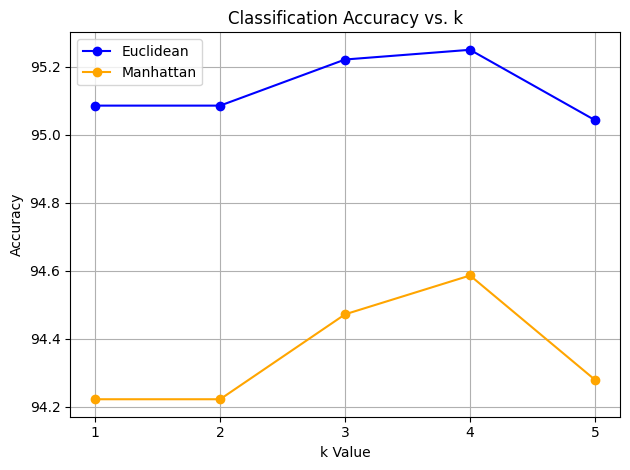

In [ ]:
#[8 marks]
#TODO: Plot a graph with k values on the x-axis and classification accuracy on the y-axis (both distances on one plot).

print("Euclidean Distance Accuracy: ", [f"{float(a):.4f}" for a in accuracy_list_euclidean])
print("Euclidean Distance F1 Scores: ", [f"{float(f1):.4f}" for f1 in f1_list_euclidean])
print("Manhattan Distance Accuracy: ", [f"{float(a):.4f}" for a in accuracy_list_manhattan])
print("Manhattan Distance F1 Scores: ", [f"{float(f1):.4f}" for f1 in f1_list_manhattan])



# Plotting code remains the same
# plt.figure(figsize=(12, 6))

# Plot accuracy
# plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(k_values, accuracy_list_euclidean, marker='o', label='Euclidean', color='blue')
plt.plot(k_values, accuracy_list_manhattan, marker='o', label='Manhattan', color='orange')
plt.title('Classification Accuracy vs. k')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.legend()

# Show plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

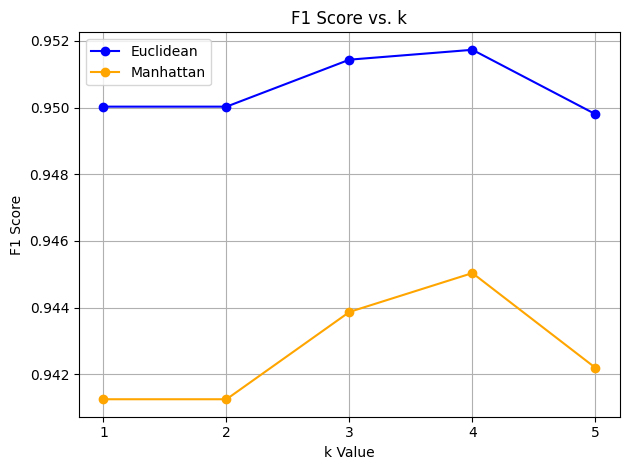

In [ ]:
#TODO: Plot a graph with k values on the x-axis and F1-score on the y-axis (both distances on one plot).

# Plot F1 scores
# plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(k_values, f1_list_euclidean, marker='o', label='Euclidean', color='blue')
plt.plot(k_values, f1_list_manhattan, marker='o', label='Manhattan', color='orange')
plt.title('F1 Score vs. k')
plt.xlabel('k Value')
plt.ylabel('F1 Score')
plt.xticks(k_values)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

###  Prediction 

Running k-NN with k=4 using Euclidean distance
Test Accuracy (Euclidean): 97.1400, Macro F1 Score: 0.9712


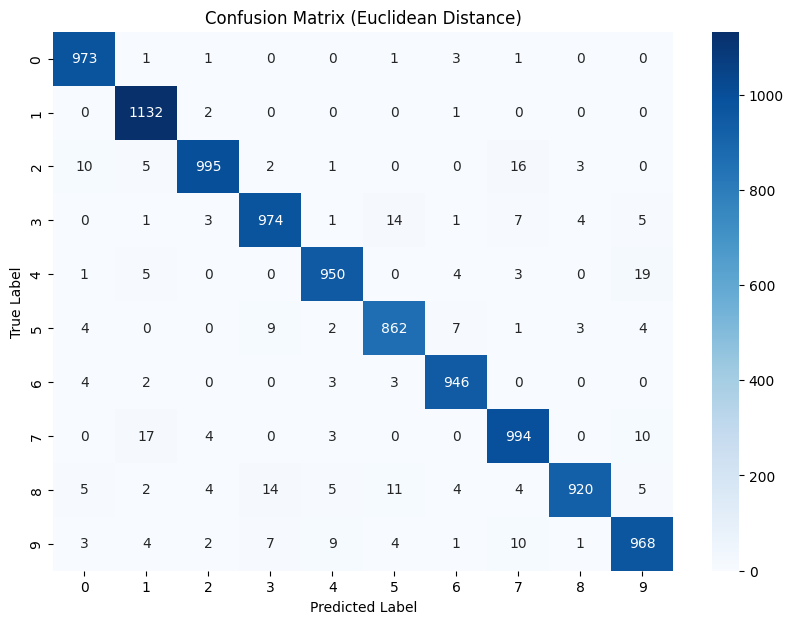

In [ ]:
best_k = 4

knn = KNN(best_k)


knn.fit(train_features_normalized, train_labels)

test_features_1000 = test_features_normalized[:10000]
test_labels_1000 = test_labels[:10000]

print(f"Running k-NN with k={best_k} using Euclidean distance")
predictions_euclidean_test_1000 = knn.predict(test_features_1000, distancefunc=knn.euclidean_distance)

accuracy_euclidean_test_1000 = accuracy(predictions_euclidean_test_1000, test_labels_1000)
f1_euclidean_test_1000 = macro_average_f1(make_confusion_matrix(predictions_euclidean_test_1000, test_labels_1000))

print(f"Test Accuracy (Euclidean): {accuracy_euclidean_test_1000:.4f}, Macro F1 Score: {f1_euclidean_test_1000:.4f}")

conf_matrix_euclidean_test_100 = make_confusion_matrix(predictions_euclidean_test_1000, test_labels_1000)
make_heat_map(conf_matrix_euclidean_test_100, 'Confusion Matrix (Euclidean Distance)')

euclidean_test_results_100 = {
    "accuracy": accuracy_euclidean_test_1000,
    "f1_score": f1_euclidean_test_1000,
    "confusion_matrix": conf_matrix_euclidean_test_100
}


Running k-NN with k=4 using Manhattan distance
Test Accuracy (Manhattan): 96.5900, Macro F1 Score: 0.9659


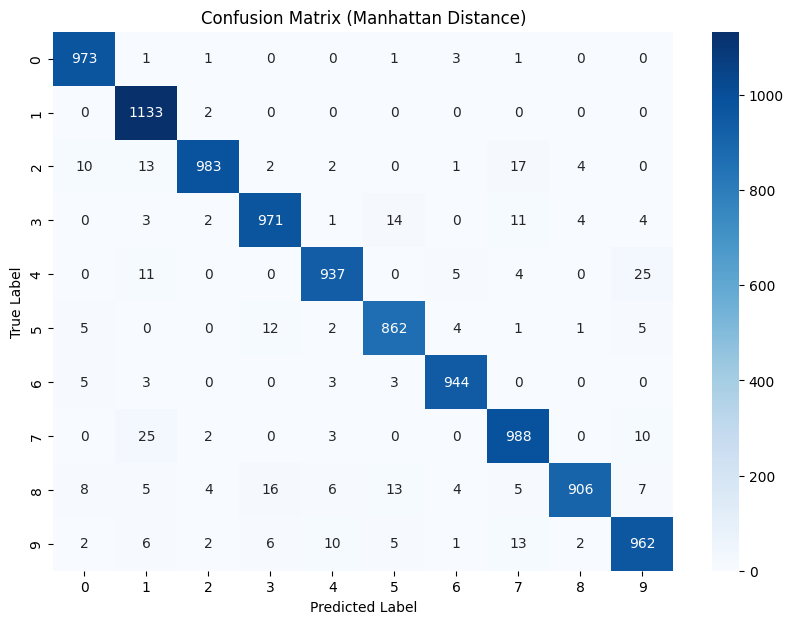

In [ ]:
# # TODO: Test with the best K for Manhattan distance on the test set [6 marks]
best_k = 4

knn = KNN(best_k)

knn.fit(train_features_normalized, train_labels)

test_features_1000 = test_features_normalized[:10000]
test_labels_1000 = test_labels[:10000]

print(f"Running k-NN with k={best_k} using Manhattan distance")
predictions_manhattan_test_1000 = knn.predict(test_features_1000, distancefunc=knn.manhattan_distance)

accuracy_manhattan_test_1000 = accuracy(predictions_manhattan_test_1000, test_labels_1000)
f1_manhattan_test_1000 = macro_average_f1(make_confusion_matrix(predictions_manhattan_test_1000, test_labels_1000))

print(f"Test Accuracy (Manhattan): {accuracy_manhattan_test_1000:.4f}, Macro F1 Score: {f1_manhattan_test_1000:.4f}")

conf_matrix_manhattan_test_1000 = make_confusion_matrix(predictions_manhattan_test_1000, test_labels_1000)
make_heat_map(conf_matrix_manhattan_test_1000, 'Confusion Matrix (Manhattan Distance)')

manhattan_test_results_1000 = {
    "accuracy": accuracy_manhattan_test_1000,
    "f1_score": f1_manhattan_test_1000,
    "confusion_matrix": conf_matrix_manhattan_test_1000
}



## KNN using Scikit-Learn 



In [1]:
# %pip install scikit-learn==1.4.2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Accuracy (Euclidean): 0.9682
Macro F1 Score (Euclidean): 0.9681


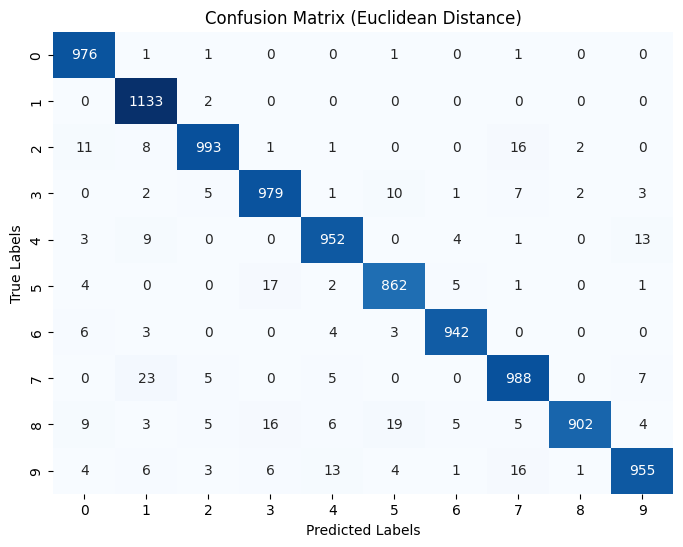

In [12]:
#TODO: Using the best value of K from part one, train and test a KNN classifier with Euclidean distance [5 marks]
#      Display accuracy, macro f1 score, and a heat map of confusion matrix

best_k_euclidean = 4

knn_euclidean = KNeighborsClassifier(n_neighbors=best_k_euclidean, metric='euclidean')

knn_euclidean.fit(train_features_normalized, train_labels)

euclidean_predictions = knn_euclidean.predict(test_features_normalized)

accuracy_euclidean = accuracy_score(test_labels, euclidean_predictions)
print(f"Accuracy (Euclidean): {accuracy_euclidean:.4f}")

report_euclidean = classification_report(test_labels, euclidean_predictions, output_dict=True)
macro_f1_euclidean = report_euclidean['macro avg']['f1-score']
print(f"Macro F1 Score (Euclidean): {macro_f1_euclidean:.4f}")

conf_matrix_euclidean = confusion_matrix(test_labels, euclidean_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_euclidean, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Euclidean Distance)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



Accuracy (Manhattan): 0.9631, Macro F1 Score: 0.9628


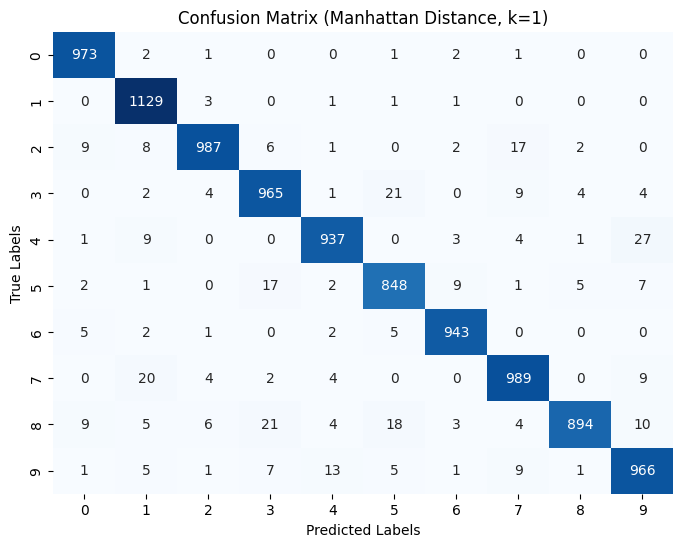

In [ ]:
#TODO: Using the best value of K from part one, train and test a KNN classifier with Manhattan distance [5 marks]
#      Display accuracy, macro f1 score, and a heat map of confusion matrix

best_k = 4

knn_manhattan = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')

knn_manhattan.fit(train_features_normalized, train_labels)

predicted_labels_manhattan = knn_manhattan.predict(test_features_normalized)

accuracy_manhattan = accuracy_score(test_labels, predicted_labels_manhattan)

report_manhattan = classification_report(test_labels, predicted_labels_manhattan, output_dict=True)
f1_manhattan = report_manhattan['macro avg']['f1-score']

conf_matrix_manhattan = confusion_matrix(test_labels, predicted_labels_manhattan)

print(f"Accuracy (Manhattan): {accuracy_manhattan:.4f}, Macro F1 Score: {f1_manhattan:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_manhattan, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f'Confusion Matrix (Manhattan Distance, k={best_k})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


##  Radius nearest neighbors 

In [13]:
import pandas as pd
#TODO: Read the dataset into a pandas dataframe, display its shape, and its first 5 rows [3 marks]

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/breast-cancer.csv'
data = pd.read_csv(file_path)

print("Shape of the dataset:", data.shape)

print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of the dataset: (569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414    

In [15]:
# TODO: Drop the ID column
data = data.drop(columns=['id'])
data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})

print("Updated shape of the dataset:", data.shape)
print(data.head())


Updated shape of the dataset: (569, 31)
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0    

<ipython-input-15-7bc71397ff9e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})


In [16]:
import pandas as pd
import numpy as np

train_size = int(0.8 * len(data))
train_data = data.sample(n=train_size, random_state=42)
test_data = data.drop(train_data.index)  # The remaining 20% for test set

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

# Step 2: Split features from labels
train_x = train_data.drop(columns=['diagnosis'])
train_y = train_data['diagnosis']
test_x = test_data.drop(columns=['diagnosis'])
test_y = test_data['diagnosis']  # Labels for test set

# Print the shape of train_x, train_y, test_x, test_y
print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)


Train data shape: (455, 31)
Test data shape: (114, 31)
Train X shape: (455, 30)
Train Y shape: (455,)
Test X shape: (114, 30)
Test Y shape: (114,)


In [17]:
if isinstance(train_x, pd.DataFrame):
    train_x = train_x.to_numpy()

if isinstance(train_y, pd.Series):
    train_y = train_y.to_numpy()

if isinstance(test_x, pd.DataFrame):
    test_x = test_x.to_numpy()

if isinstance(test_y, pd.Series):
    test_y = test_y.to_numpy()

# Print the shapes of the converted arrays
print("Converted Train X shape:", train_x.shape)
print("Converted Train Y shape:", train_y.shape)
print("Converted Test X shape:", test_x.shape)
print("Converted Test Y shape:", test_y.shape)

train_mean = np.mean(train_x, axis=0)
train_std = np.std(train_x, axis=0)

train_x_standardized = (train_x - train_mean) / train_std

test_mean = np.mean(test_x, axis=0)
test_std = np.std(test_x, axis=0)

test_x_standardized = (test_x - test_mean) / test_std
# print(test_x_standardized[:5])


Converted Train X shape: (455, 30)
Converted Train Y shape: (455,)
Converted Test X shape: (114, 30)
Converted Test Y shape: (114,)


###  Implementing r-NN Classifier 



In [19]:
class RNN:

    def __init__(self, r):
        self.r = r
        self.train_x = None
        self.train_y = None

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

    def manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2), axis=1)

    def fit(self, train_x, train_y):
        self.train_x = train_x
        self.train_y = train_y

    def get_neighbors(self, new_point, distancefunc):
        distances = distancefunc(self.train_x, new_point)
        within_radius = distances <= self.r
        neighbors_labels = self.train_y[within_radius]
        return neighbors_labels, distances[within_radius]

    def predict(self, test_x, distancefunc):
        predictions = []
        majority_class = np.bincount(self.train_y).argmax()

        for test_point in test_x:
            neighbors, distances = self.get_neighbors(test_point, distancefunc)

            if len(neighbors) == 0:
                predictions.append(majority_class)
            else:
                weights = 1 / (distances + 1e-5)
                w_counts = np.bincount(neighbors, weights=weights)

                max_w = np.max(w_counts)
                most_common_labels = np.where(w_counts == max_w)[0]

                if len(most_common_labels) > 1:  # Tie detected
                    # Resolve the tie by removing the furthest neighbor
                    furthest_distance_index = np.argmax(distances)
                    # Create a mask to exclude the furthest neighbor
                    neighbors = np.delete(neighbors, furthest_distance_index)
                    distances = np.delete(distances, furthest_distance_index)

                    if len(neighbors) > 0:
                        weights = 1 / (distances + 1e-5)
                        w_counts = np.bincount(neighbors, weights=weights)
                        predictions.append(np.argmax(w_counts))
                    else:
                        predictions.append(majority_class)
                else:
                    predictions.append(np.argmax(w_counts))
        return np.array(predictions)


###  k-fold Cross Validation 

In [20]:
def k_fold_cross_validation_rnn(num_folds, r, train_x, train_y, distanceFunction):
    """
    Returns the predictions for all the data points in the dataset using k-fold cross validation

    num_folds: int
      Number of folds
    r: float
      Radius of neighbors to consider (hyperparameter)
    train_x: np array
      The dataset features to be used
    train_y: np array
      The dataset labels to be used
    distanceFunction: str
      The distance function to be used
    """

    rnn = RNN(r)

    predictions = np.empty(train_y.shape, dtype=train_y.dtype)

    fold_size = len(train_x)

    for cv_no in range(num_folds):
        val_start = cv_no * fold_size
        val_end = val_start + fold_size
        val_indices = np.arange(val_start, val_end)
        train_indices = np.concatenate((np.arange(0, val_start), np.arange(val_end, len(train_x))))

        train_x_fold = train_x[train_indices]
        train_y_fold = train_y[train_indices]
        val_x = train_x[val_indices]

        rnn.fit(train_x_fold, train_y_fold)

        if distanceFunction == 'euclidean':
            distance_func = rnn.euclidean_distance
        elif distanceFunction == 'manhattan':
            distance_func = rnn.manhattan_distance
        else:
            raise ValueError("Unsupported distance function specified.")

        val_predictions = rnn.predict(val_x, distance_func)

        # Store the predictions in the correct order
        predictions[val_indices] = val_predictions

    return predictions


In [21]:
#TODO: Unformally sample 20 values of r in the range mentioned above for both distances. [2 marks]
#      Hint: Sort the sampled values for a nice graph later on

euclidean_r_values = np.linspace(3.5, 5.5, num=20)
manhattan_r_values = np.linspace(15.5, 17.5, num=20)

euclidean_r_values.sort()
manhattan_r_values.sort()

# List for storing results
accuracy_list_euclidean = []
f1_list_euclidean = []
accuracy_list_manhattan = []
f1_list_manhattan = []


In [23]:
# TODO: Perform cross validation and report the results (accuracy and macro f1) for euclidean distances for each r [3 marks]
# # TODO: Perform cross validation and report the results (accuracy and macro f1) for euclidean distances for each r [3 marks]
from sklearn.metrics import accuracy_score, f1_score

for r in euclidean_r_values:
    predictions = k_fold_cross_validation_rnn(5, r, train_x_standardized, train_y, 'euclidean')
    accuracy = accuracy_score(train_y, predictions)
    f1 = f1_score(train_y, predictions, average='macro')

    accuracy_list_euclidean.append(accuracy)
    f1_list_euclidean.append(f1)



# Output the results
print("Euclidean Distance Results:")
for r, accuracy, f1 in zip(euclidean_r_values, accuracy_list_euclidean, f1_list_euclidean):
    print(f"r: {r:.2f}, Accuracy: {accuracy:.4f}, Macro-F1: {f1:.4f}")


# r_debug = euclidean_r_values[19]  # or choose any specific index/value you want to test

# # Step 2: Cross-validate for Euclidean distance with a single r
# predictions = k_fold_cross_validation_rnn(5, r_debug, train_x_standardized, train_y, 'euclidean')
# accuracy = accuracy_score(train_y, predictions)
# f1 = f1_score(train_y, predictions, average='macro')

# # Append the results to the lists
# accuracy_list_euclidean.append(accuracy)
# f1_list_euclidean.append(f1)

# # Output the results
# print("Euclidean Distance Results for r =", r_debug)
# print(f"Accuracy: {accuracy:.4f}, Macro-F1: {f1:.4f}")


Euclidean Distance Results:
r: 3.50, Accuracy: 0.8703, Macro-F1: 0.8463
r: 3.61, Accuracy: 0.8747, Macro-F1: 0.8521
r: 3.71, Accuracy: 0.8791, Macro-F1: 0.8579
r: 3.82, Accuracy: 0.8879, Macro-F1: 0.8687
r: 3.92, Accuracy: 0.8945, Macro-F1: 0.8772
r: 4.03, Accuracy: 0.9055, Macro-F1: 0.8910
r: 4.13, Accuracy: 0.9055, Macro-F1: 0.8910
r: 4.24, Accuracy: 0.9055, Macro-F1: 0.8910
r: 4.34, Accuracy: 0.9121, Macro-F1: 0.8995
r: 4.45, Accuracy: 0.9099, Macro-F1: 0.8964
r: 4.55, Accuracy: 0.9121, Macro-F1: 0.8988
r: 4.66, Accuracy: 0.9143, Macro-F1: 0.9015
r: 4.76, Accuracy: 0.9077, Macro-F1: 0.8933
r: 4.87, Accuracy: 0.9121, Macro-F1: 0.8988
r: 4.97, Accuracy: 0.9143, Macro-F1: 0.9015
r: 5.08, Accuracy: 0.9143, Macro-F1: 0.9015
r: 5.18, Accuracy: 0.9077, Macro-F1: 0.8933
r: 5.29, Accuracy: 0.9077, Macro-F1: 0.8933
r: 5.39, Accuracy: 0.9077, Macro-F1: 0.8933
r: 5.50, Accuracy: 0.9077, Macro-F1: 0.8933


In [24]:
# TODO: Perform cross validation and report the results for manhattan distances for each r [3 marks]
# Step 3: Cross-validate for Manhattan distance
for r in manhattan_r_values:
    predictions = k_fold_cross_validation_rnn(5, r, train_x_standardized, train_y, 'manhattan')
    accuracy = accuracy_score(train_y, predictions)
    f1 = f1_score(train_y, predictions, average='macro')

    accuracy_list_manhattan.append(accuracy)
    f1_list_manhattan.append(f1)


print("\nManhattan Distance Results:")
for r, accuracy, f1 in zip(manhattan_r_values, accuracy_list_manhattan, f1_list_manhattan):
    print(f"r: {r:.2f}, Accuracy: {accuracy:.4f}, Macro-F1: {f1:.4f}")


Manhattan Distance Results:
r: 15.50, Accuracy: 0.8835, Macro-F1: 0.8641
r: 15.61, Accuracy: 0.8835, Macro-F1: 0.8641
r: 15.71, Accuracy: 0.8835, Macro-F1: 0.8641
r: 15.82, Accuracy: 0.8857, Macro-F1: 0.8669
r: 15.92, Accuracy: 0.8857, Macro-F1: 0.8669
r: 16.03, Accuracy: 0.8901, Macro-F1: 0.8730
r: 16.13, Accuracy: 0.8901, Macro-F1: 0.8730
r: 16.24, Accuracy: 0.8923, Macro-F1: 0.8753
r: 16.34, Accuracy: 0.8923, Macro-F1: 0.8753
r: 16.45, Accuracy: 0.8923, Macro-F1: 0.8753
r: 16.55, Accuracy: 0.8923, Macro-F1: 0.8753
r: 16.66, Accuracy: 0.8923, Macro-F1: 0.8753
r: 16.76, Accuracy: 0.8901, Macro-F1: 0.8725
r: 16.87, Accuracy: 0.8923, Macro-F1: 0.8753
r: 16.97, Accuracy: 0.8967, Macro-F1: 0.8804
r: 17.08, Accuracy: 0.8967, Macro-F1: 0.8804
r: 17.18, Accuracy: 0.8989, Macro-F1: 0.8832
r: 17.29, Accuracy: 0.9011, Macro-F1: 0.8855
r: 17.39, Accuracy: 0.9011, Macro-F1: 0.8855
r: 17.50, Accuracy: 0.9055, Macro-F1: 0.8910


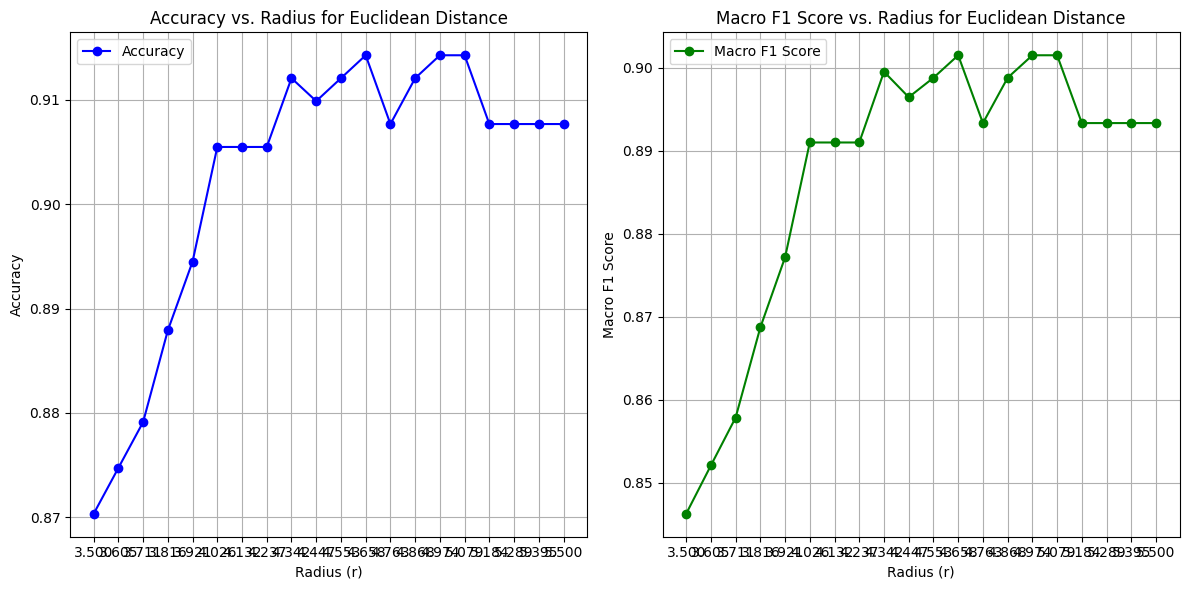

In [25]:
#TODO: Plot the scores for euclidean distance [3 marks]
#      Report the values of r on the x-axis, and corresponding accuracy and f1 score on the y-axis
#      Hint: This plot does not have the same structure as that of part 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(euclidean_r_values, accuracy_list_euclidean, marker='o', color='b', label='Accuracy')
plt.title('Accuracy vs. Radius for Euclidean Distance')
plt.xlabel('Radius (r)')
plt.ylabel('Accuracy')
plt.grid()
plt.xticks(euclidean_r_values)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(euclidean_r_values, f1_list_euclidean, marker='o', color='g', label='Macro F1 Score')
plt.title('Macro F1 Score vs. Radius for Euclidean Distance')
plt.xlabel('Radius (r)')
plt.ylabel('Macro F1 Score')
plt.grid()
plt.xticks(euclidean_r_values)
plt.legend()

plt.tight_layout()
plt.show()

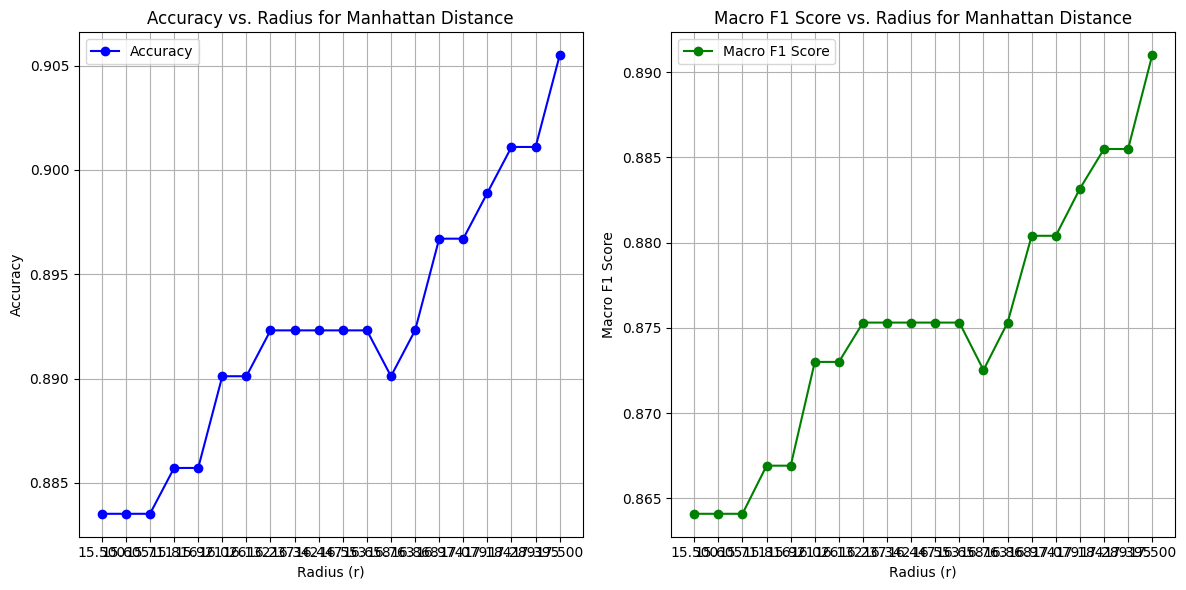

In [26]:
#TODO: Make a similar plot for Manhattan distance as well with r on x-axis and accuracy and f1 on y-axis. Make sure your plots are properly labelled [3 marks]

plt.figure(figsize=(12, 6))

# Create a subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(manhattan_r_values, accuracy_list_manhattan, marker='o', color='b', label='Accuracy')
plt.title('Accuracy vs. Radius for Manhattan Distance')
plt.xlabel('Radius (r)')
plt.ylabel('Accuracy')
plt.grid()
plt.xticks(manhattan_r_values)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(manhattan_r_values, f1_list_manhattan, marker='o', color='g', label='Macro F1 Score')
plt.title('Macro F1 Score vs. Radius for Manhattan Distance')
plt.xlabel('Radius (r)')
plt.ylabel('Macro F1 Score')
plt.grid()
plt.xticks(manhattan_r_values)
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


### Prediction 

Euclidean Distance Results:
Accuracy: 0.8860, Macro F1 Score: 0.8755


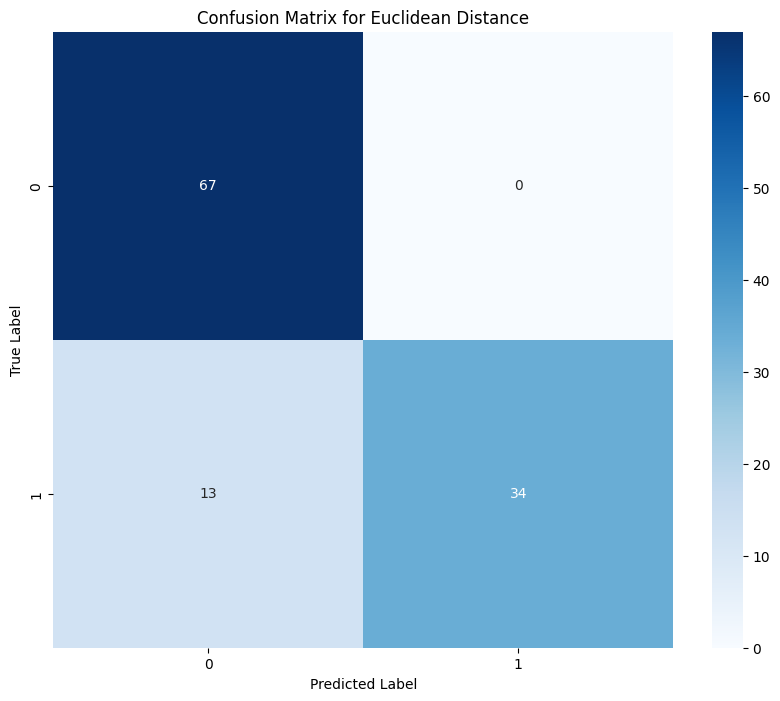

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score



best_euclidean_r = euclidean_r_values[np.argmax(accuracy_list_euclidean)]

euclidean_model = RNN(r=best_euclidean_r)

euclidean_model.fit(train_x_standardized, train_y)

euclidean_predictions = euclidean_model.predict(test_x_standardized, euclidean_model.euclidean_distance)

euclidean_accuracy = accuracy_score(test_y, euclidean_predictions)
euclidean_f1 = f1_score(test_y, euclidean_predictions, average='macro')
euclidean_cm = confusion_matrix(test_y, euclidean_predictions)

print("Euclidean Distance Results:")
print(f"Accuracy: {euclidean_accuracy:.4f}, Macro F1 Score: {euclidean_f1:.4f}")

plt.figure(figsize=(10, 8))
sns.heatmap(euclidean_cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(test_y), yticklabels=np.unique(test_y))
plt.title('Confusion Matrix for Euclidean Distance')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Manhattan Distance Results:
Accuracy: 0.9035, Macro F1 Score: 0.8958


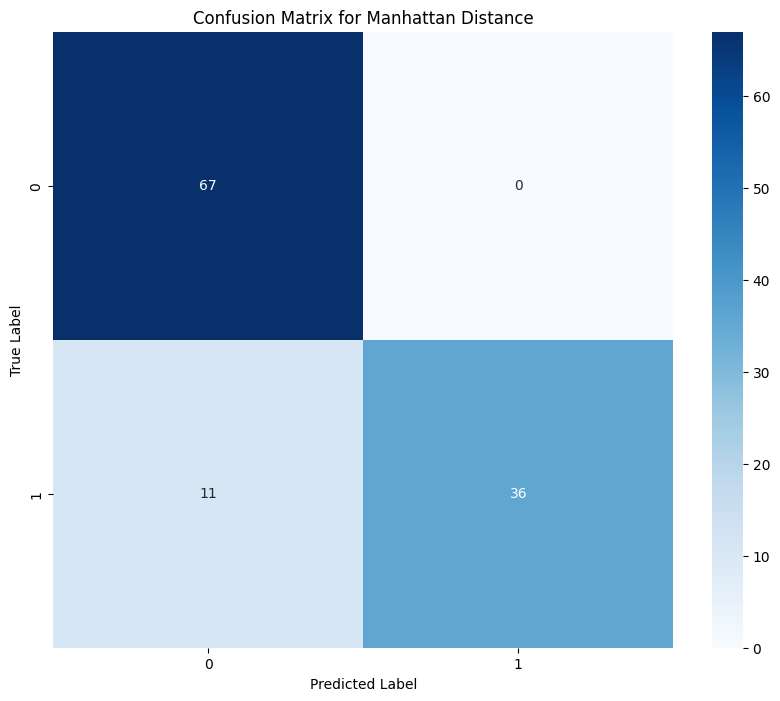

In [28]:
best_manhattan_r = manhattan_r_values[np.argmax(accuracy_list_manhattan)]

manhattan_model = RNN(r=best_manhattan_r)

manhattan_model.fit(train_x_standardized, train_y)

manhattan_predictions = manhattan_model.predict(test_x_standardized, manhattan_model.manhattan_distance)

manhattan_accuracy = accuracy_score(test_y, manhattan_predictions)
manhattan_f1 = f1_score(test_y, manhattan_predictions, average='macro')
manhattan_cm = confusion_matrix(test_y, manhattan_predictions)

print("\nManhattan Distance Results:")
print(f"Accuracy: {manhattan_accuracy:.4f}, Macro F1 Score: {manhattan_f1:.4f}")

plt.figure(figsize=(10, 8))
sns.heatmap(manhattan_cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(test_y), yticklabels=np.unique(test_y))
plt.title('Confusion Matrix for Manhattan Distance')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
